# 제 4장. 신뢰구간의 추정

### 구간 추정

* 표본의 통계량으로부터 범위를 지정해, 모수를 추정한다.
* 이렇게 했을 때 특정한 한 점에서의 추정(불편추정, 점추정)과는 달리 구간으로 계산되므로 정밀도를 알 수 있다는 장점이 있다.
* 신뢰구간(Confidence interval): 모수가 어느 범위 안에 있는지를 확률적으로 보여줌.
  * 신뢰하한(Lower Confidence Limit): 신뢰구간의 하한값
  * 신뢰상한(Upper Confidence Limit): 신뢰구간의 상한값

### 신뢰계수

* 추출과 구간추정을 100회 실시한 경우 모수(모평균)가 추정구간에 95회 정도 들어가는 것 $\rightarrow$ 신뢰계수 95%
* 신뢰계수가 99%인 경우 모수(모평균)가 100회 추정 시 99회는 추정 구간에 포함되는 것으로 **구간이 넓어지기 때문에** 추정에 도움이 되지 않을 수 있기 때문에 조심해야 한다.


### 정규분포를 사용한 모평균의 구간추정

* 구간추정의 기본. 단 표본이 충분히 크지 않거나, 모분산을 알 수 없으면 사용할 수 없다.
* 신뢰계수가 95%일 때 오차
$$ 1.96 \times \frac{\sigma}{\sqrt{n}}$$

* 여기서 $\frac{\sigma}{\sqrt{n}}$는 표준오차.
* 여기서 1.96은 z값으로 z 분포표나 엑셀의 경우 ```NORM.S.INV```함수, python의 경우 ```norm.ppf```로 계산할 수 있다.

In [0]:
%pylab inline
from scipy.stats import norm, t

Populating the interactive namespace from numpy and matplotlib


`norm.ppf`에 입력하는 값이 `0.025`인 이유는 `(1 - 0.95) / 2 = 2.5%`이기 때문이다.

![정규분포 이미지](https://t1.daumcdn.net/cfile/tistory/27394D405451FE310B)

In [0]:
abs(norm.ppf(0.025))

1.9599639845400545

**Q. 어느 회사에서 생산하는 제품의 평균수명을 조사하는데, 이 제품의 모표준편차($\sigma$)는 40일이라고 한다. 
이 때 표본 100개를 뽑아 제품의 수명을 측정하였더니, 평균이 800일이 나왔다고 한다. 
이 때 제품의 평균수명에 대한 90% 신뢰구간, 95% 신뢰구간, 99% 신뢰구간을 구하여라.**

[출처: https://math7.tistory.com](https://math7.tistory.com/65)

In [0]:
def confidence_interval(size, bar_x, s, coef=95):
    """
    정규분포의 confidence Interval 계산
    """
    assert -100 <= coef <= 100, 'Confidence Coeficent is must smaller than 100%'
    
    q = (1 - coef / 100) / 2
    z = abs(norm.ppf(q))
    stderr = s / np.sqrt(size)
    
    cl, cu = bar_x - (z * stderr), bar_x + (z * stderr)
    
    tex = rf'${cl:.2f} \leq \mu \leq {cu:.2f}$ (interval: ${cu-cl:.2f}$)'
    ax = plt.axes([0.1, 0.1, 0.1, 0.1])
    ax.axis('off')
    plt.text(0.3,0.4, tex, size=14)


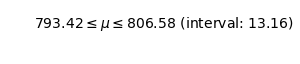

In [0]:
confidence_interval(100, 800, 40, coef=90)

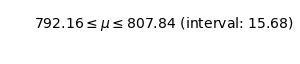

In [0]:
confidence_interval(100, 800, 40, coef=95)

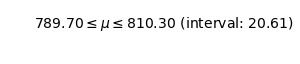

In [0]:
confidence_interval(100, 800, 40, coef=99)

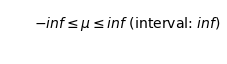

In [0]:
confidence_interval(100, 800, 40, coef=100)

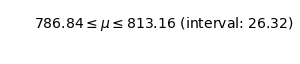

In [0]:
confidence_interval(100, 800, 40, coef=99.9)

* 신뢰계수($90\%$ $\rightarrow$ $99\%$)가 점점 증가할수록 구간(interval)의 범위가 넓어진다 = 모수가 표본의 신뢰구간에 포함될 확률이 올라간다.

### 표준화 정규($Z$)분포를 사용한 모평균의 구간추정

* 표준화한 표본평균의 표준오차는 1이므로, 95% 표준화된 표본평균 $Z_{\bar{x}}$의 신뢰구간은 $Z_{\bar{x}} \pm 1.96 \times 1$이다.

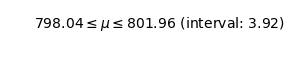

In [0]:
# 코드에서는 표준오차를 1로 만들기 위해 size와 s를 1로 만들었다.
confidence_interval(1, 800, 1, coef=95)

### t 분포를 사용한 모평균의 구간추정

* 표본이 크지 않고, 모분산을 모르는 경우에는 t 분포를 사용해 추정한다.
* t분포는 z분포보다 오차를 더 크게 예측하기 때문에, (신뢰구간 또한) z분포보다 더 넓게 추정한다.
* t분포는 자유도(df)가 작아질수록 z분포보다 더 넓게 추정한다.
* 보통 모분산을 모르는 경우가 아는 경우보다 많기 때문에 t분포를 이용해 구간을 추정한다.
* t값은 t분포표를 참고하거나, 엑셀의 경우 `T.INV.2T`, python의 경우 `t.ppf(.025, df)`로 계산한다.

**NOTE** 

***"t분포는 z분포보다 오차를 더 크게 예측하기 때문에, (신뢰구간 또한) z분포보다 더 넓게 추정한다."***의 의미는 아래와 같다.

$$Z_{sem} = \frac{s}{\sqrt{n}} \leq \frac{s}{\sqrt{n-1}} = T_{sem}$$

따라서, 자유도가 작아질수록($n-1$) z분포보다 넓게 추정한다는 말 또한 이해할 수 있다.

**Q. 어느 회사에서 제품의 모평균을 추정하기 위해 30개의 표본을 뽑았다. 표본평균은 $\bar{X} = 400$이고, 표준편차 $s = 20$이라고 할 때, 이 제품의 평균에 대한 90, 95, 99% 신뢰구간을 추정하라.**

In [0]:
def confidence_interval_t(size, bar_x, s, coef=95):
    """
    정규분포의 confidence Interval 계산
    """
    assert -100 <= coef <= 100, 'Confidence Coeficent is must smaller than 100%'
    
    q = (1 - coef / 100) / 2
    z = abs(t.ppf(q, size-1))
    stderr = s / np.sqrt(size-1)
    
    cl, cu = bar_x - (z * stderr), bar_x + (z * stderr)
    
    tex = rf'${cl:.2f} \leq \mu \leq {cu:.2f}$ (interval: ${cu-cl:.2f}$)'
    ax = plt.axes([0.1, 0.1, 0.1, 0.1])
    ax.axis('off')
    plt.text(0.3,0.4, tex, size=14)


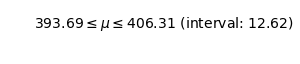

In [0]:
confidence_interval_t(30, 400, 20, coef=90)

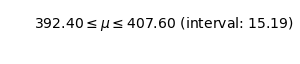

In [0]:
confidence_interval_t(30, 400, 20, coef=95)

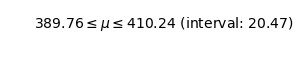

In [0]:
confidence_interval_t(30, 400, 20, coef=99)

### 모비율의 구간추정(정규분포)

* TV 시청률 신뢰구간 추정 등과 같은 표본비율의 신뢰구간 추정 시 주로 사용된다.

$$ \text{표본비율 } \hat{p} = \frac{\text{어떤 성질을 갖는 요소의 수 }x}{\text{표본의 전 요소의 수 }n}$$

* 표본이 충분히 클 경우 모비율 p에 대한 신뢰구간은 아래와 같이 계산한다(wald의 방법)

$$ \hat{p} - Z_{\alpha/2} \times \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \leq  p  \leq \hat{p} + Z_{\alpha/2} \times \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$


* 표본이 작을 때, 본래의 신뢰계수 구간보다 작아지고, 아래와 같이 식을 보정해 추정한다(Agresti, Coull의 방법)

$$ \hat{p}' - Z_{\alpha/2} \times \sqrt{\frac{\hat{p}'(1-\hat{p}')}{n+4}} \leq  p  \leq \hat{p}' + Z_{\alpha/2} \times \sqrt{\frac{\hat{p}'(1-\hat{p}')}{n+4}}\text{, 단 }\hat{p}' = \frac{x+2}{n+4}$$


**Q. 30,000명의 임직원이 있는 선우네 두부공장에서 직원 복지를 위해 하루 1모 두부를 가져가는 복지정책이 신설되었다. 선우네 두부공장 대표 김선우는 이 복지에 직원들이 만족하는지 보기 위해 100명을 선발해 만족도를 조사하였다. 100명 중에 20명이 만족했을 때, 95% 신뢰구간을 계산하라**

In [0]:
def ratio_ci(n, x, coef=95):
    """
    정규분포의 confidence Interval 계산
    """
    assert -100 <= coef <= 100, 'Confidence Coeficent is must smaller than 100%'
    
    q = (1 - coef / 100) / 2
    z = abs(norm.ppf(q))
    
    parent, child = 0, 0
    if n < 30:
        parent, child = 4, 2
    
    
    p_hat = (x + child) / (n + parent)
    stderr = np.sqrt((p_hat * (1 - p_hat)) / (n + parent))
    
    cl, cu = p_hat - (z * stderr), p_hat + (z * stderr)
    
    tex = rf'${cl:.2f} \leq \mu \leq {cu:.2f}$ (interval: ${cu-cl:.2f}$)'
    ax = plt.axes([0.1, 0.1, 0.1, 0.1])
    ax.axis('off')
    plt.text(0.3,0.4, tex, size=14)


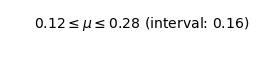

In [0]:
ratio_ci(100, 20)

### 모분산의 구간추정( $\chi^2$분포 )

* 모분산의 신뢰구간은 표본분산 그리고 불편분산과 비례하는 통계량이 $\chi^2$분포를 따른다는 점을 이용해 간접 추정한다.
* 표본분산과 비례하는 통계량
$$\chi^{2}_{(n-1)}= \frac{n \times s^2}{\sigma^2}\text{ or }\frac{(n-1) \times \hat{\sigma}^2}{\sigma^2}$$
$$\sigma^2= \frac{n \times s^2}{\chi^{2}_{(n-1)}}\text{ or }\frac{(n-1) \times \hat{\sigma}^2}{\chi^{2}_{(n-1)}}$$

* 모분산의 신뢰구간(표본분산의 경우)

$$\frac{n \times s^2}{\chi^2_{(n-1)}} \leq \sigma^2 \leq \frac{n \times s^2}{\chi^2_{(n-1)}}$$

**Q. 아래와 같은 크기의 무당벌레 다섯마리를 채집하였다. 이 무당벌레의 몸길이에 대한 모분산의 99% 구간추정을 불편분산을 이용해 계산하라.**

무당벌레 몸길이 = 5, 15, 10, 11, 8

In [0]:
ladybugs_mm = [5, 15, 10, 11, 8]

In [0]:
sigma_sq_hat = np.std(ladybugs_mm, ddof=1) ** 2

# 위의 코드는 아래와 같은 값을 return 한다.
# bar_x = sum(ladybugs_mm) / len(ladybugs_mm)
# sigma_sq_hat = sum(list(map(lambda x: (x - bar_x) ** 2, ladybugs_mm))) / (len(ladybugs_mm) - 1)

In [0]:
from scipy.stats import chi2

In [0]:
chi2.ppf(0.995, 4)

14.860259000560243

In [0]:
(1 - 0.99) /2

0.0050000000000000044

In [0]:
def sigma_ci(data, coef=99):
    q = (1 - coef / 100) / 2
    std = np.std(data, ddof=1) ** 2
    df = len(data) - 1
    cl, cu = (df * std) / chi2.ppf(1-q, df), (df * std) / chi2.ppf(q, df)
    tex = rf'${cl:.2f} \leq \sigma^2 \leq {cu:.2f}$ (interval: ${cu-cl:.2f}$)'
    ax = plt.axes([0.1, 0.1, 0.1, 0.1])
    ax.axis('off')
    plt.text(0.3,0.4, tex, size=14)


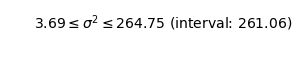

In [0]:
sigma_ci(ladybugs_mm)

### 모상관계수의 신뢰구간(정규분포)

* 표본상관계수 `r`에 피셔 z 변환을 한 통계량이 근사적으로 정규분포에 따른다는 점을 추정한다.

$$z_r - \frac{z_{\alpha / 2}}{\sqrt{n - 3}} \leq z_\rho \leq z_r + \frac{z_{\alpha / 2}}{\sqrt{n - 3}}$$

* z변환된 r값은 이해하기 어려우므로, 역변환하여 계산한다.

$$\frac{e^{2z_l}-1}{e^{2z_l}+1} \leq \rho \leq \frac{e^{2z_u}-1}{e^{2z_u}+1}$$

### 부트스트랩법

* 소표본의 경우 모집단에 확률분포를 가정할 수 없다. 따라서 모수 추정을 위해 반복적인 복원추출을 하고, 재표본을 생성하고 그 통계량을 추정하는 방법이다.
* [몬테카를로 시뮬레이션](https://ko.wikipedia.org/wiki/%EB%AA%AC%ED%85%8C%EC%B9%B4%EB%A5%BC%EB%A1%9C_%EB%B0%A9%EB%B2%95)의 일종이다.
* (머신러닝에 익숙한 분들을 위해) 랜덤포레스트 알고리즘이 이런 부트스트랩법을 활용한 알고리즘이다.

[futher read: ensemble](https://becominghuman.ai/ensemble-learning-bagging-and-boosting-d20f38be9b1e)

In [0]:
samples = [5, 2, 1, 3, 4]

means = list()
stds = list()
for _ in range(1000):
    
    data = list()
    
    for _ in range(5):
        c = np.random.choice(samples, replace=False)
        data.append(c)
        
    means.append(np.mean(data))

In [0]:
np.mean(samples), np.std(samples)

(3.0, 1.4142135623730951)

In [0]:
np.mean(means), np.std(means, ddof=1)

(3.0008000000000004, 0.644309315852638)